In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
uyku = pd.read_csv('C:\\Users\\VOLKAN\\Desktop\\uyku.txt')

In [21]:
print(uyku)


         Tarih  UykuSaati  GunlukAdimsayisi
0   06.09.2023       7.44              9158
1   07.09.2023       8.10              7706
2   08.09.2023      10.30             20413
3   09.09.2023       8.40             16845
4   10.09.2023      10.40             15000
5   11.09.2023       9.40             13263
6   12.09.2023       7.40             22508
7   13.09.2023       8.20              9907
8   14.09.2023       9.40              9595
9   15.09.2023       8.50             20011
10  16.09.2023       8.52             15318
11  17.09.2023       8.30             29682
12  18.09.2023       9.37             24157
13  19.09.2023       6.02             23389
14  20.09.2023       9.28              2442
15  21.09.2023      10.10              9255
16  22.09.2023       3.50             11559
17  23.09.2023       9.50             15895
18  24.09.2023       7.50             22134
19  25.09.2023      10.00              8508
20  26.09.2023       8.55             15460
21  27.09.2023       6.53       

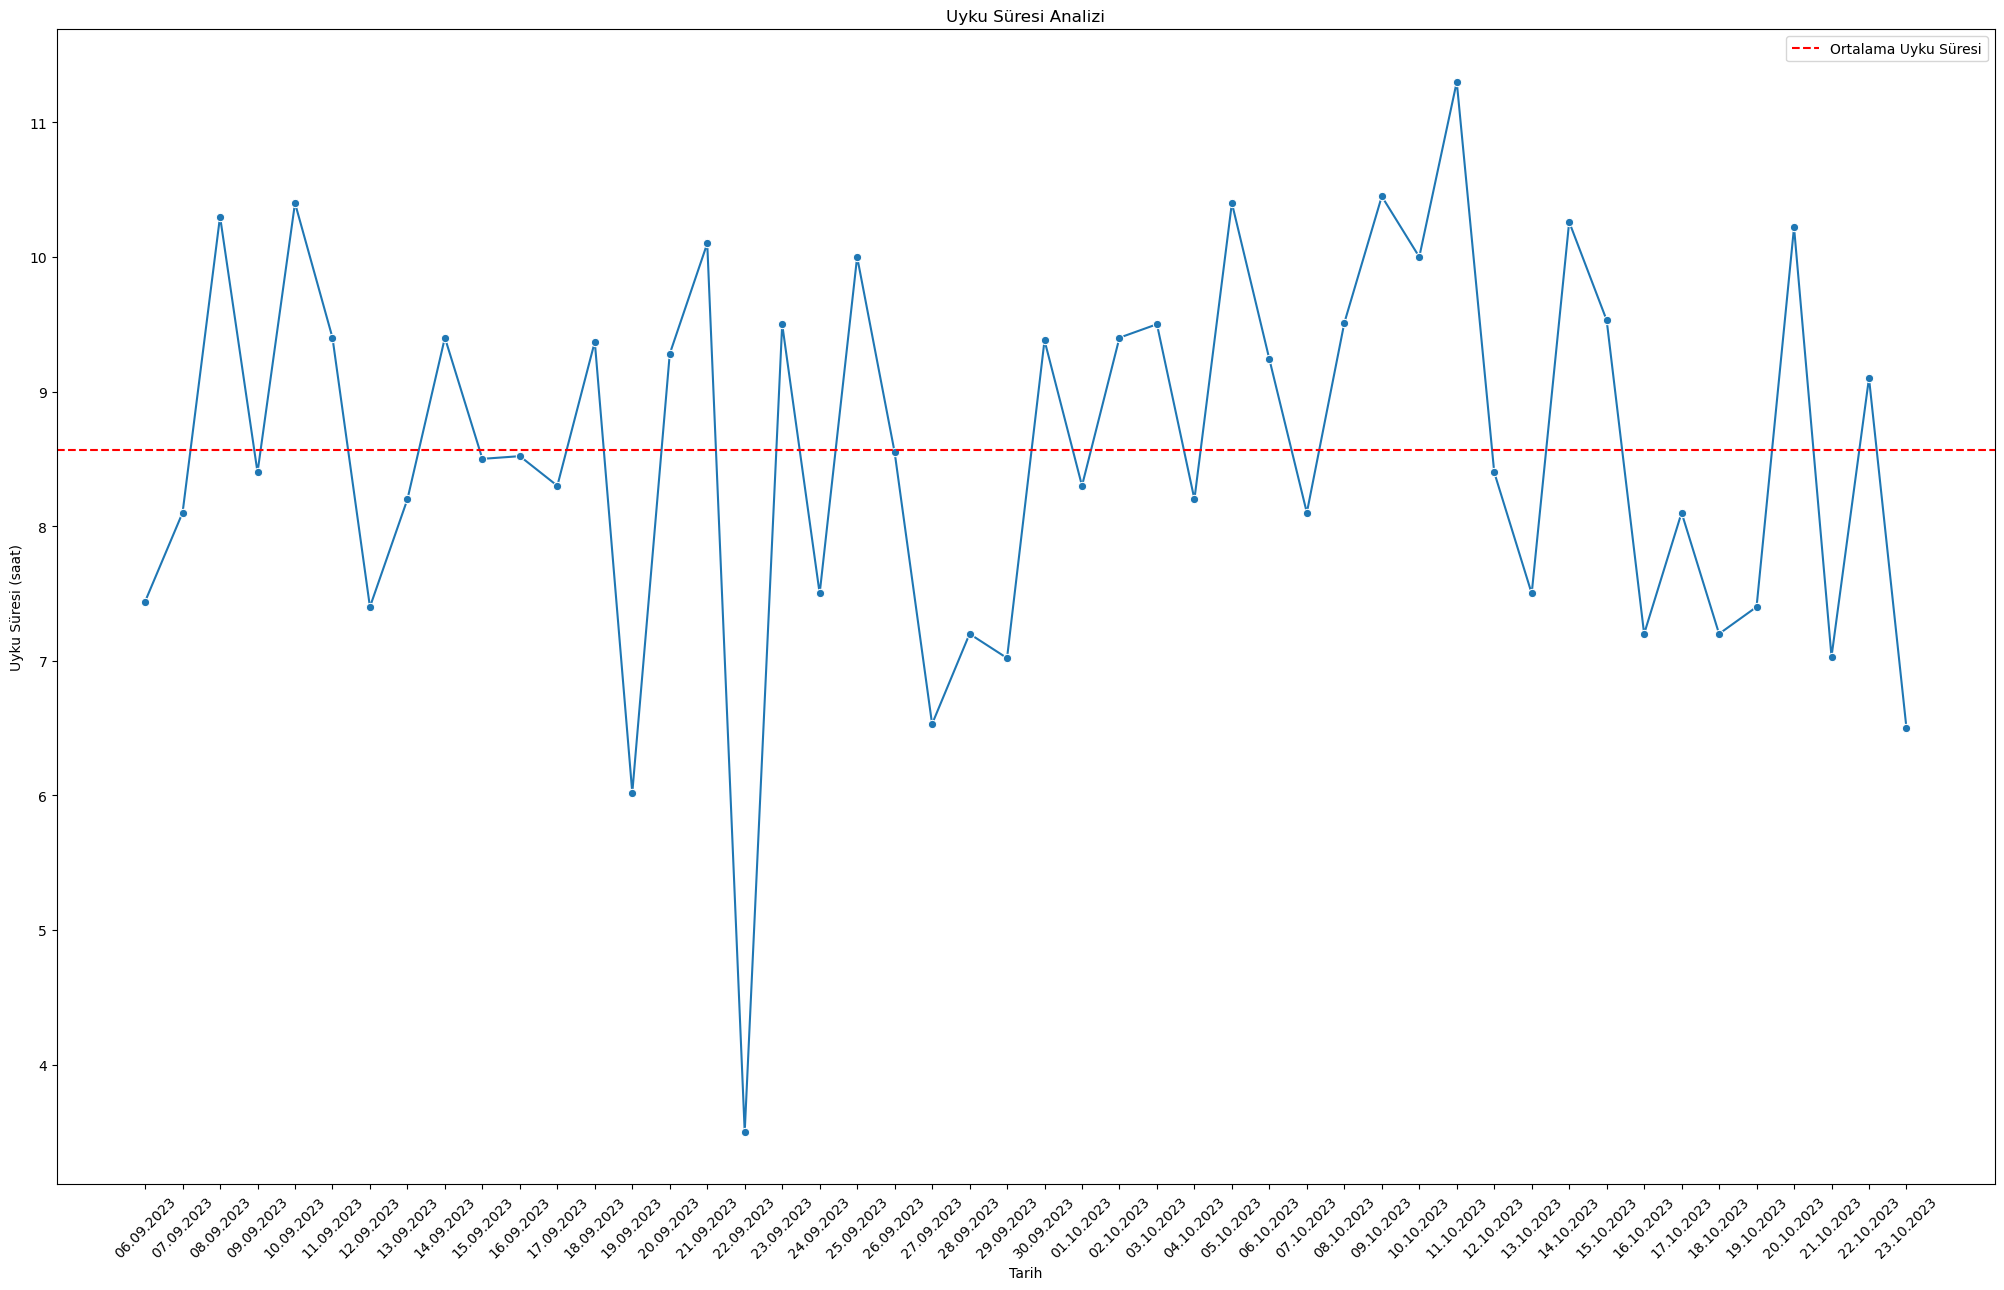

In [32]:
# Uyku Süreleri Analizi
ortalama_uyku_suresi = uyku["UykuSaati"].mean()

plt.figure(figsize=(25, 15))
sns.lineplot(x="Tarih", y="UykuSaati", data=uyku, marker="o")
plt.title("Uyku Süresi Analizi")
plt.xlabel("Tarih")
plt.ylabel("Uyku Süresi (saat)")
plt.xticks(rotation=45)
plt.axhline(ortalama_uyku_suresi, color="red", linestyle="--", label="Ortalama Uyku Süresi")
plt.legend()
plt.show()


In [36]:
print(uyku.columns)

Index(['Tarih', 'UykuSaati', 'GunlukAdimsayisi'], dtype='object')


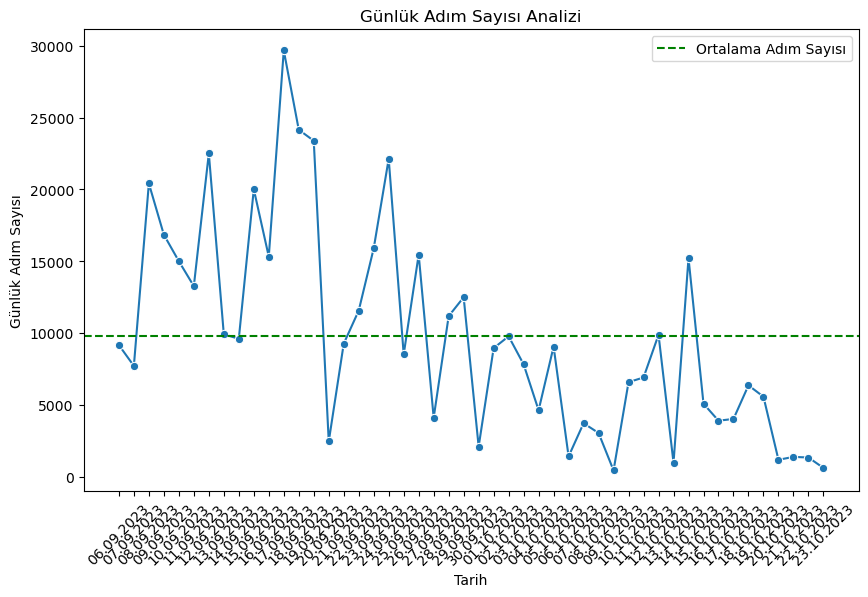

In [38]:
# Günlük Adım Sayısı Analizi
ortalama_adim_sayisi = uyku["GunlukAdimsayisi"].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x="Tarih", y="GunlukAdimsayisi", data=uyku, marker="o")
plt.title("Günlük Adım Sayısı Analizi")
plt.xlabel("Tarih")
plt.ylabel("Günlük Adım Sayısı")
plt.xticks(rotation=45)
plt.axhline(ortalama_adim_sayisi, color="green", linestyle="--", label="Ortalama Adım Sayısı")
plt.legend()
plt.show()


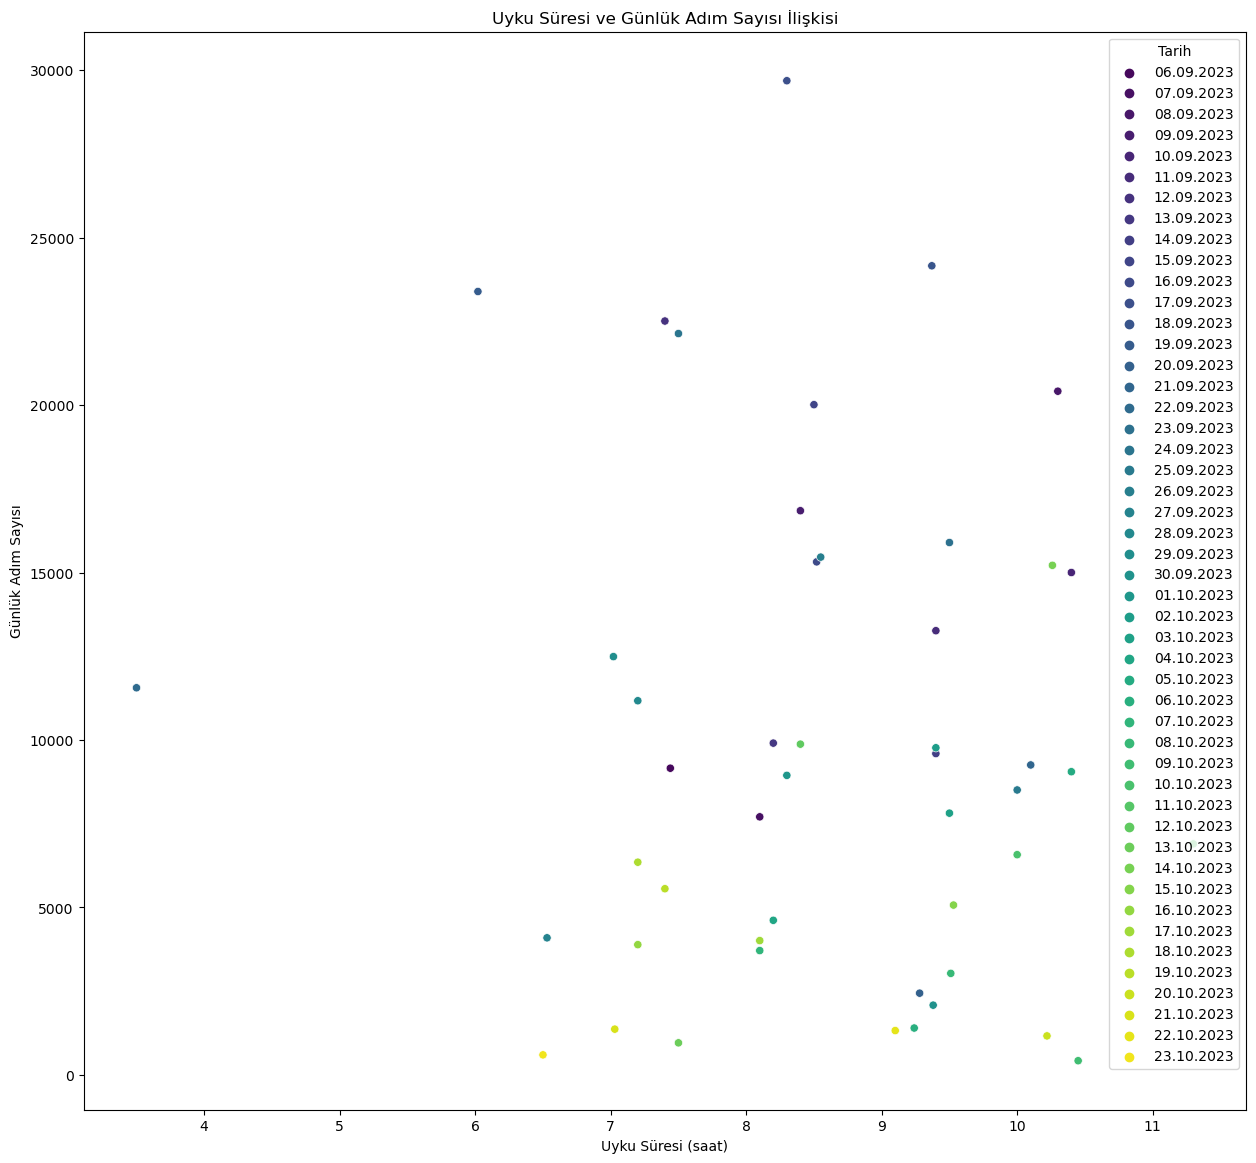

In [47]:
# Uyku Süresi ve Günlük Adım Sayısı İlişkisi
plt.figure(figsize=(15, 14))
sns.scatterplot(x="UykuSaati", y="GunlukAdimsayisi", data=uyku, hue="Tarih", palette="viridis")
plt.title("Uyku Süresi ve Günlük Adım Sayısı İlişkisi")
plt.xlabel("Uyku Süresi (saat)")
plt.ylabel("Günlük Adım Sayısı")
plt.show()


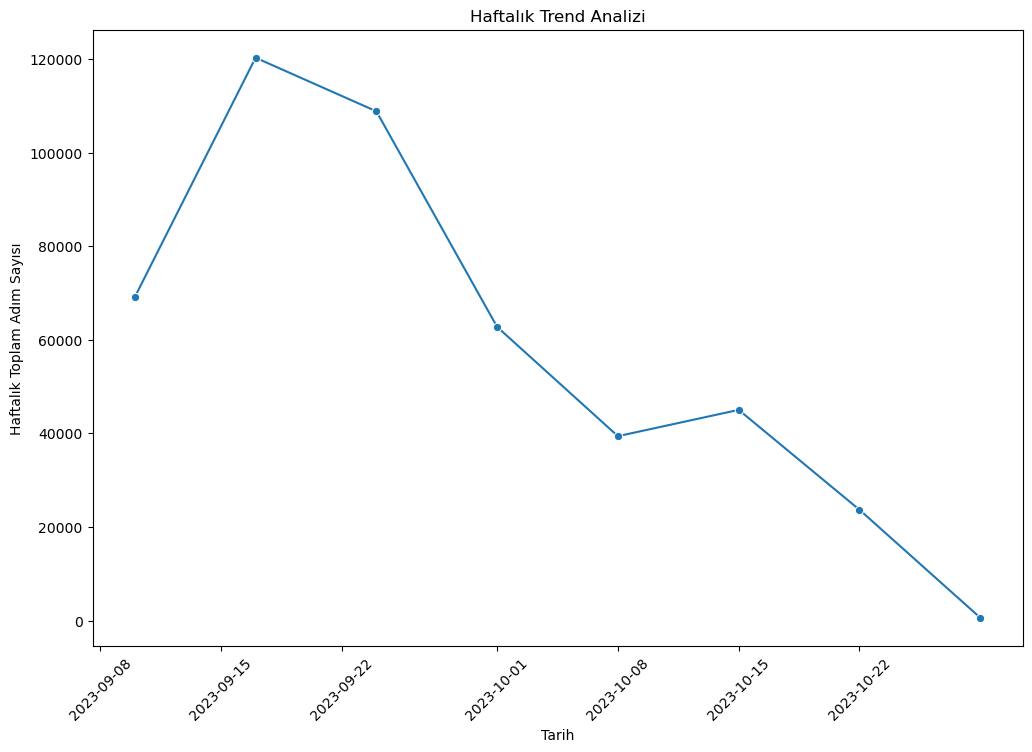

In [51]:
# Haftalık Trend Analizi
uyku['Tarih'] = pd.to_datetime(uyku['Tarih'], format='%d.%m.%Y')
uyku.set_index('Tarih', inplace=True)

haftalik_adimlar = uyku.resample('W').sum()

plt.figure(figsize=(12, 8))
sns.lineplot(x=haftalik_adimlar.index, y='GunlukAdimsayisi', data=haftalik_adimlar, marker="o")
plt.title("Haftalık Trend Analizi")
plt.xlabel("Tarih")
plt.ylabel("Haftalık Toplam Adım Sayısı")
plt.xticks(rotation=45)
plt.show()


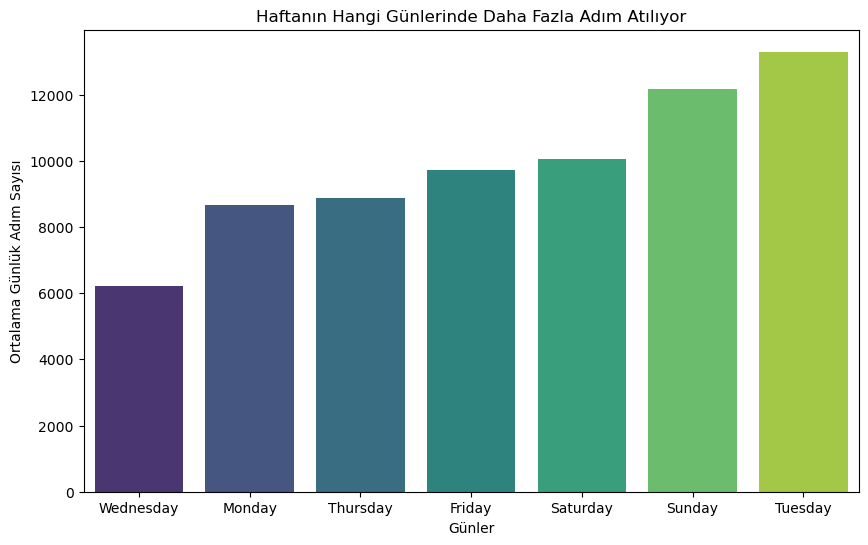

In [56]:
# Haftanın Hangi Günlerinde Daha Fazla Adım Atılıyor
gunluk_adim_gunleri = uyku.groupby(uyku.index.day_name())['GunlukAdimsayisi'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=gunluk_adim_gunleri.index, y=gunluk_adim_gunleri.values, palette="viridis")
plt.title("Haftanın Hangi Günlerinde Daha Fazla Adım Atılıyor")
plt.xlabel("Günler")
plt.ylabel("Ortalama Günlük Adım Sayısı")
plt.show()


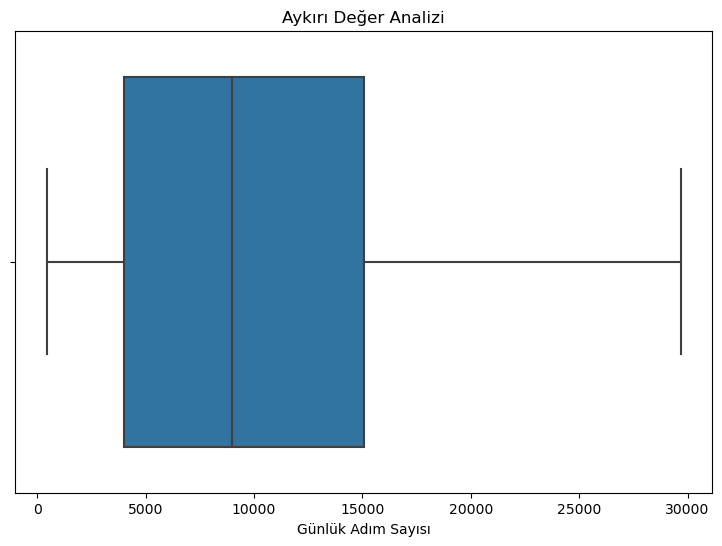

In [100]:
# Aykırı Değer Analizi
plt.figure(figsize=(9, 6))
sns.boxplot(x=uyku["GunlukAdimsayisi"])
plt.title("Aykırı Değer Analizi")
plt.xlabel("Günlük Adım Sayısı")
plt.show()



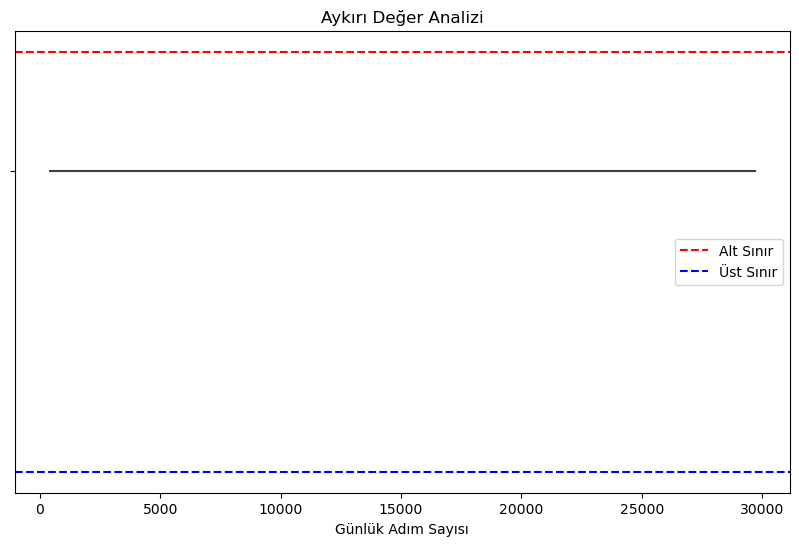

In [68]:
# Aykırı Değerleri Belirleme
q1 = uyku["GunlukAdimsayisi"].quantile(0.25)
q3 = uyku["GunlukAdimsayisi"].quantile(0.75)
iqr = q3 - q1

alt_sinir = q1 - 1.5 * iqr
ust_sinir = q3 + 1.5 * iqr

# Aykırı Değerleri Görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(x=uyku["GunlukAdimsayisi"])
plt.axhline(alt_sinir, color="red", linestyle="--", label="Alt Sınır")
plt.axhline(ust_sinir, color="blue", linestyle="--", label="Üst Sınır")
plt.title("Aykırı Değer Analizi")
plt.xlabel("Günlük Adım Sayısı")
plt.legend()
plt.show()


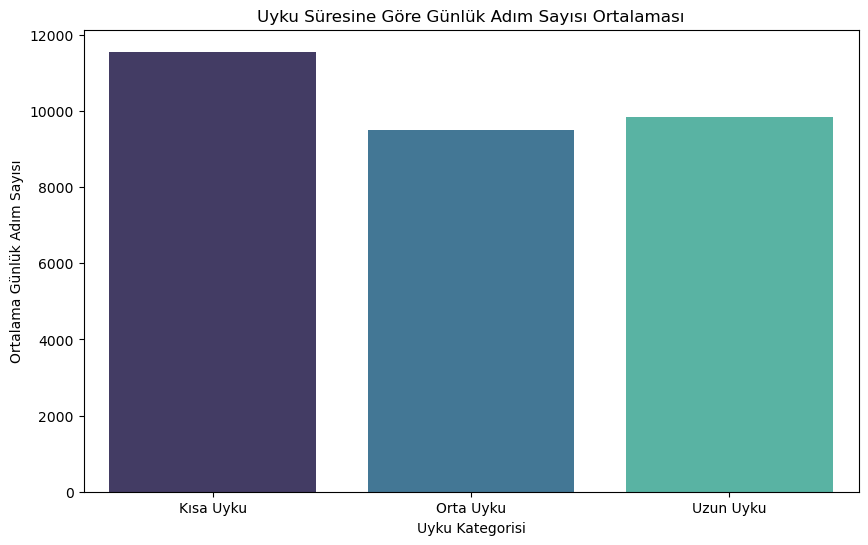

In [87]:
# Uyku Süresini Kategorilere Ayırma
uyku["UykuKategori"] = pd.cut(uyku["UykuSaati"], bins=[0, 6, 8, 12], labels=["Kısa Uyku", "Orta Uyku", "Uzun Uyku"])

# Kategoriye Göre Günlük Adım Sayısının Ortalaması
uyku_kategori_ortalama = uyku.groupby("UykuKategori")["GunlukAdimsayisi"].mean().sort_values()

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=uyku_kategori_ortalama.index, y=uyku_kategori_ortalama.values, palette="mako")
plt.title("Uyku Süresine Göre Günlük Adım Sayısı Ortalaması")
plt.xlabel("Uyku Kategorisi")
plt.ylabel("Ortalama Günlük Adım Sayısı")
plt.show()


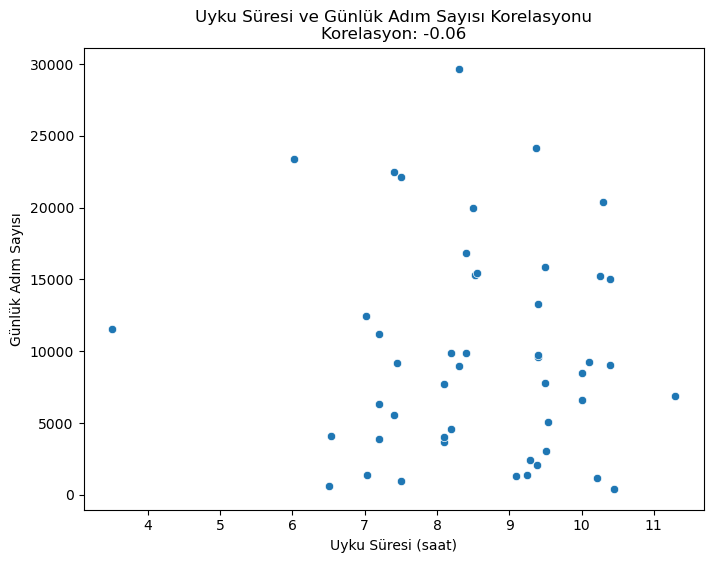

In [89]:
# Korelasyon Analizi
korelasyon = uyku["UykuSaati"].corr(uyku["GunlukAdimsayisi"])

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.scatterplot(x=uyku["UykuSaati"], y=uyku["GunlukAdimsayisi"])
plt.title(f"Uyku Süresi ve Günlük Adım Sayısı Korelasyonu\nKorelasyon: {korelasyon:.2f}")
plt.xlabel("Uyku Süresi (saat)")
plt.ylabel("Günlük Adım Sayısı")
plt.show()


# Bu, iki değişken arasında ters yönlü bir ilişki olduğunu gösterir. Yani bir değişken artarken diğeri azalır ve bu azalma, ancak çok zayıf bir şekilde gerçekleşir.

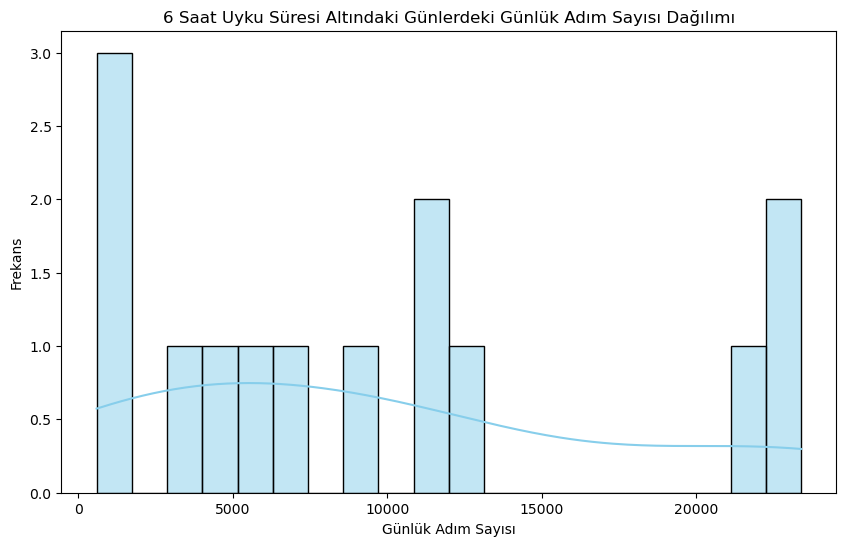

In [96]:
# Uyku Süresi Altındaki Günleri Seçme
uykusuz_gunler = uyku[uyku["UykuSaati"] <8]

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(uykusuz_gunler["GunlukAdimsayisi"], bins=20, kde=True, color="skyblue")
plt.title("6 Saat Uyku Süresi Altındaki Günlerdeki Günlük Adım Sayısı Dağılımı")
plt.xlabel("Günlük Adım Sayısı")
plt.ylabel("Frekans")
plt.show()


In [98]:
# Bu durumda uyku süresi kısalığı ile daha az aktivite arasında bir ilişki olabileceğini söyleyebiliriz